# Lab 00: Palmer Penguins

---
author: Yiran Hu
date: January 25, 2024
embed-resources: true
---

## Introduction

In this lab, the focus is on the challenges of visually identifying penguin species using Palmer Penguins data, particularly for future researchers who might lack proficiency in this area. The lab's goal is to develop two classification models(Dummy Classifier and Decision Tree Classifier) that can accurately determine a penguin's species based on measurable physical characteristics, specifically bill depth and length. This approach aims to simplify species identification by relying on easily trainable and quantifiable attributes.

## Methods

In [21]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from joblib import dump

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Data

In [22]:
penguins_train = pd.read_csv("https://cs307.org/lab-00/data/penguins-train.csv")
penguins_test = pd.read_csv("https://cs307.org/lab-00/data/penguins-test.csv")

Use data from Palmer Penguins data. The data includes measurements for penguin species, bill lengths, bill depths, etc.

In [23]:
penguins_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,40.5,17.9,187.0,3200.0,female,2007
1,Chinstrap,Dream,49.2,18.2,195.0,4400.0,male,2007
2,Chinstrap,Dream,52.8,20.0,205.0,4550.0,male,2008
3,Adelie,Biscoe,37.6,17.0,185.0,3600.0,female,2008
4,Gentoo,Biscoe,47.3,15.3,222.0,5250.0,male,2007
...,...,...,...,...,...,...,...,...
228,Gentoo,Biscoe,49.6,15.0,216.0,4750.0,male,2008
229,Adelie,Torgersen,37.2,19.4,184.0,3900.0,male,2008
230,Adelie,Biscoe,39.7,17.7,193.0,3200.0,female,2009
231,Chinstrap,Dream,45.2,17.8,198.0,3950.0,female,2007


#### Summary Statistics

In [24]:
# Response: Counts and Proportions
train_count = penguins_train.groupby("species").agg('count').reset_index()
train_sum = train_count['year'][0] + train_count['year'][1] + train_count['year'][2]
train_count['proportion'] = train_count['year'] / train_sum
train_count['count'] = train_count['year']

# Delete other columns, remain only three columns
train_count = train_count[['species', 'count', 'proportion']]
train_count

,species,count,proportion
0,Adelie,98,0.420601
1,Chinstrap,45,0.193133
2,Gentoo,90,0.386266


In [25]:
# Feature: Bill Depth & Bill Length
bill_mean = penguins_train[['species','bill_depth_mm','bill_length_mm']].groupby('species').agg('mean').reset_index()
bill_mean

,species,bill_depth_mm,bill_length_mm
0,Adelie,18.276531,38.929592
1,Chinstrap,18.388889,48.793333
2,Gentoo,14.990000,47.621111


In [26]:
bill_std = penguins_train[['species','bill_depth_mm','bill_length_mm']].groupby('species').agg('std').reset_index()
bill_std

,species,bill_depth_mm,bill_length_mm
0,Adelie,1.185375,2.786351
1,Chinstrap,1.094661,3.387638
2,Gentoo,0.972781,3.160127


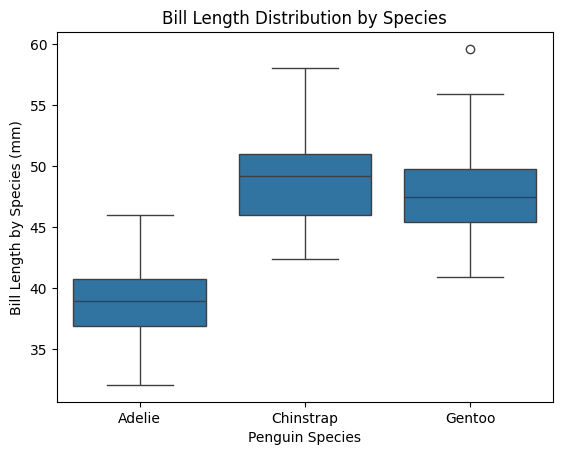

In [27]:
# visualizations
sns.boxplot(x = 'species', y = 'bill_length_mm', data = penguins_train)
plt.title("Bill Length Distribution by Species")
plt.xlabel("Penguin Species")
plt.ylabel("Bill Length by Species (mm)")
plt.show()

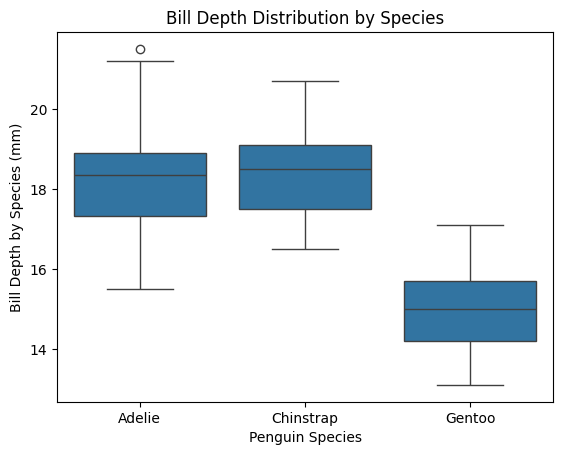

In [28]:
sns.boxplot(x = 'species', y = 'bill_depth_mm', data = penguins_train)
plt.title("Bill Depth Distribution by Species")
plt.xlabel("Penguin Species")
plt.ylabel("Bill Depth by Species (mm)")
plt.show()

I wanted to analyze the distribution of bill length and bill depth among penguins, so I used boxplots, which are effective for displaying the distribution of large datasets. Utilizing the penguins_train dataframe, I created these boxplots. The results showed that, on average, the Adelie species has a noticeably shorter bill length. Conversely, the Gentoo species tends to have a smaller bill depth in comparison.

### Models

In [29]:
# process data for ML
X_train = penguins_train[["bill_length_mm", "bill_depth_mm"]]
y_train = penguins_train["species"]

X_test = penguins_test[["bill_length_mm", "bill_depth_mm"]]
y_test = penguins_test["species"]

In [30]:
# train models
dummy_clf = DummyClassifier()
dt_clf = DecisionTreeClassifier()

dummy_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# save models
dump(dummy_clf, "penguins-dummy.joblib")
dump(dt_clf, "penguins-dt.joblib")

['penguins-dt.joblib']

First step: include the specific columns into the dataframe that we want to train and test. Second step: create two Classifier model imported from sklearn, and fit the model. Third step: save the two models.

## Results

In [32]:
# report model metrics
print("accuracy of dummy: ", np.mean(y_test.to_numpy() == dummy_clf.predict(X_test)))
print("accuracy of decision tree: ", np.mean(y_test.to_numpy() == dt_clf.predict(X_test)))

accuracy of dummy:  0.48
accuracy of decision tree:  0.94


After fitting the model, we test the data by accuracy. The dummy model has an accuracy of 0.48 while the decision tree model has an accuracy of 0.94.

## Discussion

Based on the lab's objective and the results obtained, I will choose for the Decision Tree Classifier Model over the Dummy Classifier Model, primarily due to its higher accuracy. This decision aligns with the goal of accurately identifying penguin species based on physical characteristics such as bill depth and length.

### Conclusion

I would recommend using the Decision Tree Classifier Model in the real-world scenario of classifying penguin species at Palmer Station, Antarctica. The model's ability to accurately distinguish between species using quantifiable measurements will be valuable for researchers, especially those who may not be proficient in visual identification.